In [1]:
import os, s3fs
import xarray as xr
import dask.bag as db

from dask.distributed import Client

In [2]:
def generate_zarr(netcdf):
    with fs.open(netcdf, mode='rb', anon=True) as ncfile:
        with xr.open_dataset(ncfile, engine='h5netcdf') as ds:
            zarr_url = f's3://azavea-noaa-hydro-data/{netcdf[:-3]}.zarr'
            ds.to_zarr(zarr_url)
            return zarr_url

In [3]:
fs = s3fs.S3FileSystem()
date = '20230312'

netcdf_url = f's3://noaa-nwm-pds/nwm.{date}/short_range/nwm.t*z.short_range.channel_rt.*.conus.nc'
netcdfs = fs.glob(netcdf_url)

In [4]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 30.90 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40499,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 30.90 GiB
Comm: tcp://127.0.0.1:37001,Total threads: 1
Dashboard: http://127.0.0.1:38489/status,Memory: 7.72 GiB
Nanny: tcp://127.0.0.1:35803,


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.344818 to fit


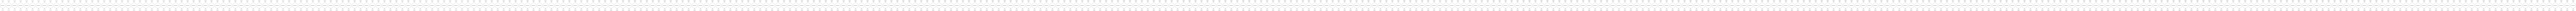

In [5]:
bag = db.from_sequence(netcdfs, npartitions=len(netcdfs)).map(generate_zarr)
bag.visualize()

In [6]:
%%time

bag.compute()

CPU times: user 47.2 s, sys: 5.82 s, total: 53 s
Wall time: 17min 6s


['s3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/short_range/nwm.t00z.short_range.channel_rt.f001.conus.zarr',
 's3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/short_range/nwm.t00z.short_range.channel_rt.f002.conus.zarr',
 's3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/short_range/nwm.t00z.short_range.channel_rt.f003.conus.zarr',
 's3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/short_range/nwm.t00z.short_range.channel_rt.f004.conus.zarr',
 's3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/short_range/nwm.t00z.short_range.channel_rt.f005.conus.zarr',
 's3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/short_range/nwm.t00z.short_range.channel_rt.f006.conus.zarr',
 's3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/short_range/nwm.t00z.short_range.channel_rt.f007.conus.zarr',
 's3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/short_range/nwm.t00z.short_range.channel_rt.f008.conus.zarr',
 's3://azavea-noaa-hydro-data/noaa-nwm-pds/nwm.20230312/

In [5]:
# Run the following one by one after the computation above is completed. If run too quickly it shutsdown the client before the work is done.

client.shutdown()
# client.close()